In [1]:
from rdkit import Chem
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV, cross_val_score, cross_validate
import os
import glob
from scipy.stats import norm
import math
import random

/home/rdkit/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Read the data  读入撞击感度数值
T_0 = pd.read_excel('FLT3MVy.xlsx')
T=np.array(T_0)
from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#T=T_minMax = min_max_scaler.fit_transform(T)
#max_abs_scaler = preprocessing.MaxAbsScaler()
#T=T_maxabs = max_abs_scaler.fit_transform(T)
#T=T.ravel()
print(T)  
print(len(T))

[[10.49]
 [10.37]
 [10.16]
 [10.15]
 [10.05]
 [10.  ]
 [10.  ]
 [ 9.97]
 [ 9.88]
 [ 9.85]
 [ 9.84]
 [ 9.83]
 [ 9.82]
 [ 9.75]
 [ 9.68]
 [ 9.68]
 [ 9.55]
 [ 9.55]
 [ 9.52]
 [ 9.51]
 [ 9.48]
 [ 9.47]
 [ 9.46]
 [ 9.42]
 [ 9.42]
 [ 9.39]
 [ 9.37]
 [ 9.36]
 [ 9.36]
 [ 9.32]
 [ 9.32]
 [ 9.3 ]
 [ 9.29]
 [ 9.22]
 [ 9.21]
 [ 9.21]
 [ 9.21]
 [ 9.21]
 [ 9.19]
 [ 9.12]
 [ 9.11]
 [ 9.11]
 [ 9.11]
 [ 9.06]
 [ 9.03]
 [ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 8.96]
 [ 8.96]
 [ 8.94]
 [ 8.92]
 [ 8.9 ]
 [ 8.89]
 [ 8.89]
 [ 8.87]
 [ 8.87]
 [ 8.86]
 [ 8.85]
 [ 8.84]
 [ 8.84]
 [ 8.8 ]
 [ 8.8 ]
 [ 8.8 ]
 [ 8.77]
 [ 8.76]
 [ 8.76]
 [ 8.76]
 [ 8.76]
 [ 8.76]
 [ 8.75]
 [ 8.75]
 [ 8.72]
 [ 8.71]
 [ 8.7 ]
 [ 8.7 ]
 [ 8.7 ]
 [ 8.7 ]
 [ 8.7 ]
 [ 8.7 ]
 [ 8.7 ]
 [ 8.7 ]
 [ 8.69]
 [ 8.69]
 [ 8.68]
 [ 8.67]
 [ 8.67]
 [ 8.67]
 [ 8.66]
 [ 8.66]
 [ 8.66]
 [ 8.65]
 [ 8.65]
 [ 8.65]
 [ 8.64]
 [ 8.64]
 [ 8.63]
 [ 8.62]
 [ 8.62]
 [ 8.6 ]
 [ 8.59]
 [ 8.58]
 [ 8.58]
 

In [3]:
#读入特征    1000种描述符数据 
X=pd.read_excel('FLT3MV1x.xlsx')
X=np.array(X)
from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#X=X_minMax = min_max_scaler.fit_transform(X)
print(X)
print(len(X[0]))
print(len(X))

[[ 0  1  0 ...  0  0 20]
 [ 0  1  0 ...  0  0 20]
 [ 1  1  0 ...  0  0 21]
 ...
 [ 0  0  1 ...  0  0 22]
 [ 0  1  0 ...  0  0 17]
 [ 0  0  0 ...  0  0 18]]
2355
844


In [4]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.1,random_state=79)

In [5]:
test_y = T_test
test_x = X_test

In [6]:
cv_x = X_train
cv_y = T_train

In [11]:
from sklearn.metrics import r2_score
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

cv_scores = []
test_scores = []
pred_valid = []
pred_test = []
MAE_scores = []
RMSE_scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=725)
for train_ix, valid_ix in kf.split(cv_x):
    train_x = cv_x[train_ix]
    valid_x = cv_x[valid_ix]
    train_y = cv_y[train_ix]
    valid_y = cv_y[valid_ix]
    regressor = lgb.LGBMRegressor(n_estimators=300,  n_jobs=1)
    regressor.fit(train_x,train_y)
    lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                       importance_type='split', learning_rate=0.1, max_depth=-1,feature_fraction=0.6,bagging_fraction=0.6,
                       min_child_samples=10, min_child_weight=0.1, min_split_gain=0.0,
                       n_estimators=240, n_jobs=-1, objective='regression', num_leaves=30,
                       random_state=None, reg_alpha=0.6, reg_lambda=0.0, silent=True,
                       subsample=0.6, subsample_for_bin=200000, subsample_freq=0)
    val_results = regressor.predict(valid_x)
    pred_valid.append(val_results)
    valid_score = r2_score(valid_y,val_results)
    cv_scores.append(valid_score)
    
    test_results = regressor.predict(test_x)
    pred_test.append(test_results)
    test_score = r2_score(test_y,test_results)
    test_scores.append(test_score)
    y_true=test_y

    MAE_score = mean_absolute_error(test_y, test_results)
    MAE_scores.append(MAE_score)
    
    RMSE_score = np.sqrt(mean_squared_error(test_y, test_results))
    RMSE_scores.append(RMSE_score)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [12]:
print('test: {:.3f}+-{:.3f}'.format(np.array(test_scores).mean(), np.array(test_scores).std()))
print('test: {:.3f}+-{:.3f}'.format(np.array(MAE_scores).mean(), np.array(MAE_scores).std()))
print('test: {:.3f}+-{:.3f}'.format(np.array(RMSE_scores).mean(), np.array(RMSE_scores).std()))

test: 0.819+-0.012
test: 0.394+-0.011
test: 0.533+-0.018


In [13]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.10,random_state=79)

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
plt.style.use('ggplot')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regressor = lgb.LGBMRegressor(n_estimators=300, n_jobs=1)
regressor.fit(X_train,T_train)
#regressor.fit(X_train,T_train)
lgb.LGBMRegressor(boosting_type='objective', class_weight=0.8, colsample_bytree=1.0, learning_rate=0.1, max_depth=10,
       min_child_samples=1, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=300, n_jobs=-1, num_leaves=310,random_state=100, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000,metric='rmse', bagging_fraction = 0.8, subsample_freq=0,feature_fraction = 0.8)


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(bagging_fraction=0.8, boosting_type='objective', class_weight=0.8,
              feature_fraction=0.8, max_depth=10, metric='rmse',
              min_child_samples=1, n_estimators=300, num_leaves=310,
              random_state=100)

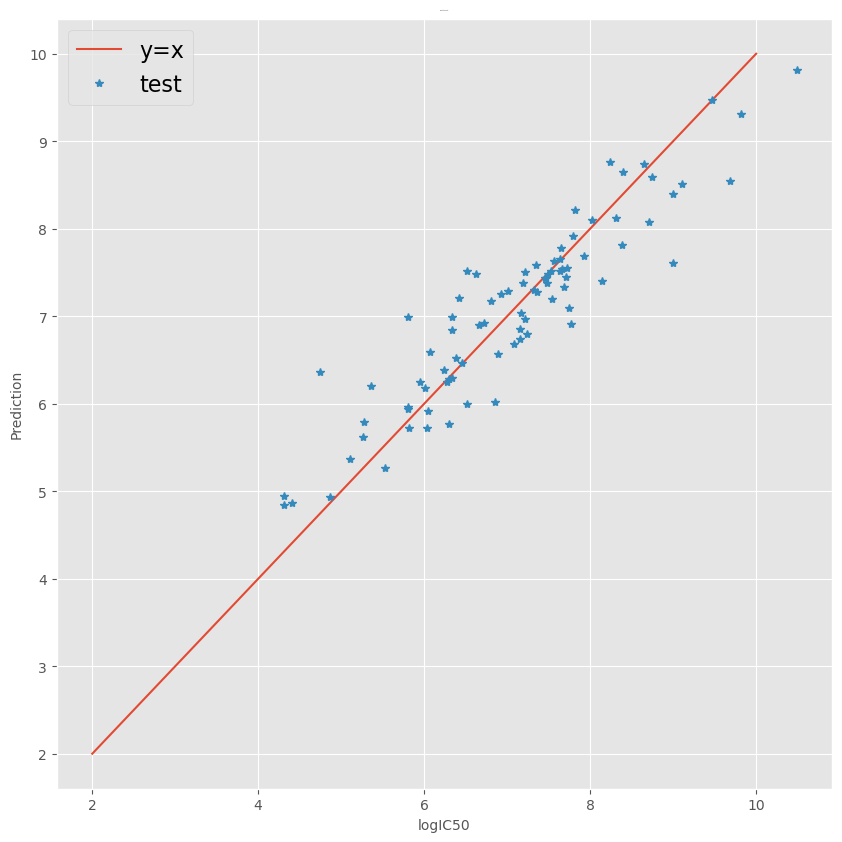

In [15]:
import matplotlib.pyplot as plt

y_true_test=T_test
y_pred_test=regressor.predict(X_test)
legend=["y=x","test"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(2,11), range(2,11),"-")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("logIC50", fontsize=10)
plt.ylabel('Prediction', fontsize=10)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [16]:
from sklearn.metrics import r2_score
print ("测试集 r^2 score",r2_score(T_test,y_pred_test))

测试集 r^2 score 0.8457015774356468


In [17]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_test
y_pred=regressor.predict(X_test)
mean_absolute_error(y_true, y_pred)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.3677227173320868

In [18]:
np.sqrt(mean_squared_error(y_true,y_pred))

0.49235946602838765

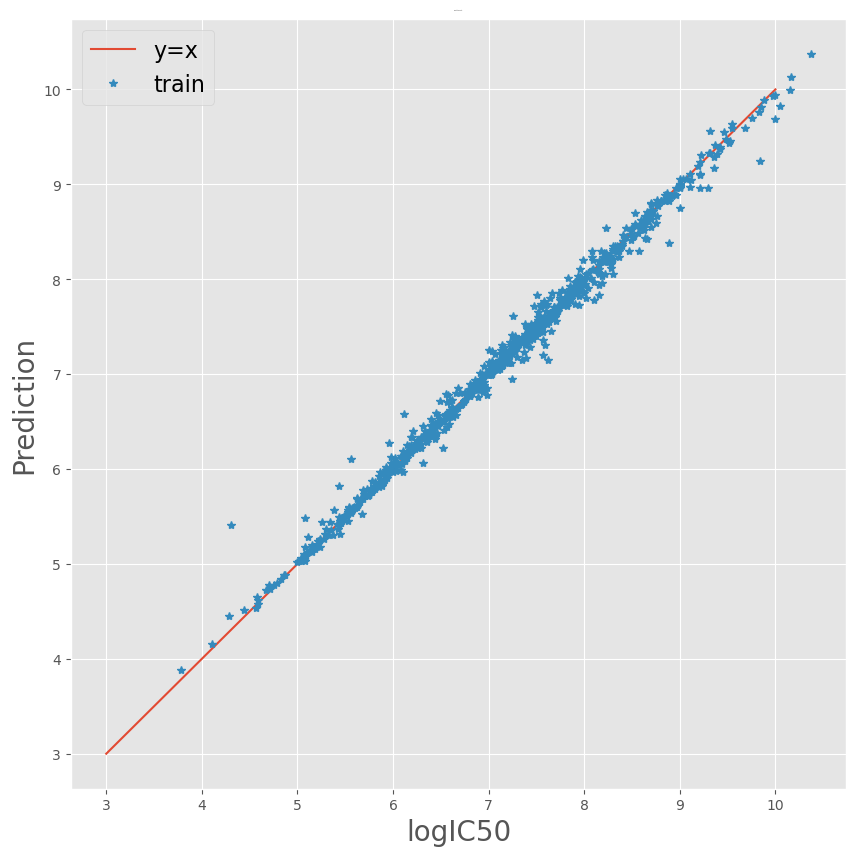

In [19]:
#查看散点图
import matplotlib.pyplot as plt
y_true_train=T_train
y_pred_train=regressor.predict(X_train)

legend=["y=x","train"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(3,11), range(3,11),"-")
plt.plot(y_true_train, y_pred_train,"*")
plt.xlabel("logIC50", fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [20]:
from sklearn.metrics import r2_score
print ("训练集 r^2 score",r2_score(T_train,y_pred_train))

训练集 r^2 score 0.9921844518386814


In [21]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_train
y_pred=regressor.predict(X_train)
mean_absolute_error(y_true, y_pred)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.061984896389084686

In [22]:
np.sqrt(mean_squared_error(y_true,y_pred))

0.10447709364718882

<Figure size 1000x1000 with 0 Axes>

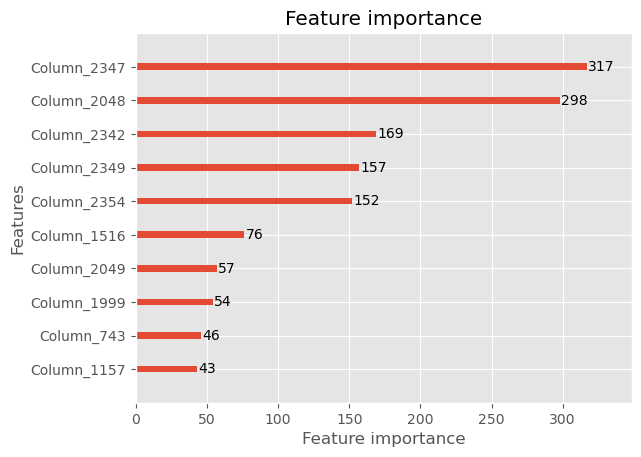

In [23]:
from lightgbm import plot_importance
# 显示重要特征
fig = plt.figure(figsize=(10,10))
plot_importance(regressor,max_num_features=10)
plt.show()

In [24]:
from sklearn import linear_model
clf = linear_model.Lasso(max_iter=200, random_state=0, alpha=0.001)# 设置正则化强度
clf.fit(X_train, T_train)  # 参数拟合
#print(regressor.coef_)  # 系数
#print(regressor.intercept_)  # 常量系数
#print(regressor.score(X, T))  # R^2，拟合优度
#print(regressor.get_params())  # 获取参数信息
#print(regressor.set_params(fit_intercept=False))  # 重
#print(regressor.predict(X))

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.302e+01, tolerance: 1.060e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001, max_iter=200, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor (
bootstrap=True, criterion='mse', max_depth=None,
max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_samples_leaf=12, min_samples_split=20,
min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
oob_score=False, random_state=None, verbose=0, warm_start=False)
clf.fit (X_train,T_train)
train=clf.score(X_train,T_train)
test=clf.score(X_test, T_test)

/tmp/ipykernel_9355/213650052.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit (X_train,T_train)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


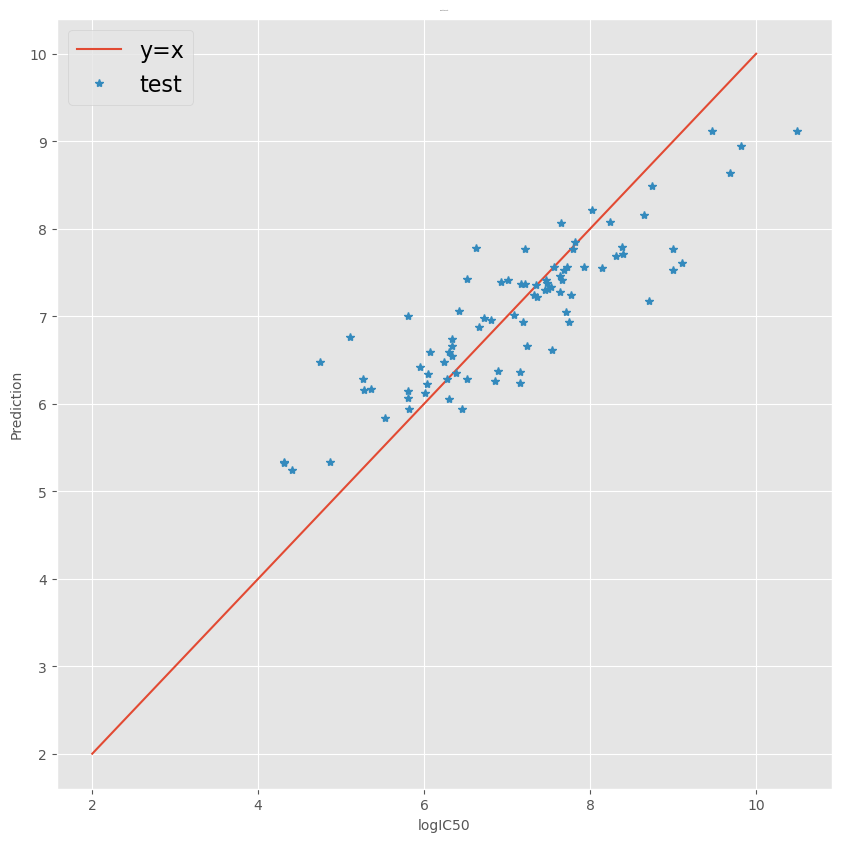

In [26]:
import matplotlib.pyplot as plt

y_true_test=T_test
y_pred_test=clf.predict(X_test)
legend=["y=x","test"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(2,11), range(2,11),"-")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("logIC50", fontsize=10)
plt.ylabel('Prediction', fontsize=10)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [27]:
from sklearn.metrics import r2_score
print ("测试集 r^2 score",r2_score(T_test,y_pred_test))

测试集 r^2 score 0.7203035429573674


In [28]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_test
y_pred=clf.predict(X_test)
mean_absolute_error(y_true, y_pred_test)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.5094577907025517

In [29]:
np.sqrt(mean_squared_error(y_true,y_pred_test))

0.6628954399107851

In [30]:
from sklearn.cross_decomposition import PLSRegression
clf = PLSRegression(n_components=5)
clf.fit(X_train, T_train)  # 训练模型

PLSRegression(n_components=5)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor (n_neighbors=4)
clf.fit (X_train,T_train)
train=clf.score(X_train,T_train)
test=clf.score(X_test, T_test)

In [32]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=500)
clf.fit(X_train,T_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)